In [7]:
# Library

import pandas as pd
import numpy as np
import requests
import string

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [8]:
# Data

data = pd.read_csv('Data_Berita.csv',encoding='unicode_escape')
data.head()

,judul,isi,kategori
0,Baekhyun EXO Berikan Contoh Baik Pencegahan Vi...,- Virus corona saat ini tengah menjadi perbin...,non_clickbait
1,Lee Seung Gi Akhirnya Beri Kabar Setelah Dicar...,- Virus corona sampai sekarang masih banyak d...,clickbait
2,"UPDATE: Jaejoong JYJ Ngaku Kena Corona, Idol K...",- Jaejoong JYJ menuliskan pengumuman yang men...,clickbait
3,"Virus Corona Masuk ke Korea, Kenapa Banyak Ora...",- Dunia sedang dibuat khawatir dengan adanya ...,clickbait
4,"16 Seleb yang Lagunya Bertema Virus Corona, Ad...",- Self quarantine untuk menghindari virus cor...,non_clickbait


In [9]:
# Preprocessing

def to_lower(text):
    return text.lower()

def remove_punct(text):
    return ''.join(c for c in text if c not in string.punctuation)

def to_strip(text):
    return " ".join(text.split())

def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output


In [10]:
# Remove Stopwords

## Stopwords From Sastrawi 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

## List Of Another Stopwords
def stopwords():
    r = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text
    data = []
    for x in r.split("\n"):
        data.append(x)
    return data

# Manually Input Stopwords 
more_stopword = ['nya','kali','sih','yg','tidaknya','mah','lah','kok','yah','bah','bro','sis','sist','dong','tuh','oh','begitu'
                ,'pas','donk','dongs','hehe','haha','hihi','dih','duh','wah','ya','yah','eh','deh','dah','wkwk','wow','si','guys','gaes','mba','mbak','mas'
                ,'bang','kak','mah','yuk','bet','loh','lho','woy','doang','tuh','euy','kakak','yuhu','aku','gw','gue','gua','elu','lu','kamu','yang','kalau'
                ,'kalo','kita','gitu','aja','saja','abang','ah','ih','hey','hai','pubg','jt','om','nggak','ngga','engga','reuters'
                ,'lu','mbak','aa','aaa','abg','adi','ahh','yaelah','ajah','alah','an','sm','ama','la','ai','abis','aduhai','ak','amd'
                ,'and','ap','spiral','khusna','woi','aduh','aw','awokwok','woi','ayo','bal','adakan','adain'
                ,'liputan6com','indozoneid','detikcom','detiktravel','detikinet','detikhot','detikers','inipasticom','jpnncom','indozoneid','uzoneid'
                ,'jawaposcom','bisniscom','kompascom','viva','tempoco','inewsid','republikacoid','merdekacom']

# Combine All
stopwordplus = factory.get_stop_words()+stopwords()+more_stopword

# Function
def remove_stopwords(text):
    return ' '.join([w for w in text.split() if not w in stopwordplus])


In [11]:
# Stemming

stemmer = StemmerFactory().create_stemmer()

def kata_stem(teks):
    stem_teks = " ".join([stemmer.stem(i) for i in teks.split()])
    return stem_teks


In [25]:
# Callback All Function

def preprocesing_all (text) :
    text = str(text)
    pre = to_lower(text)
    pre = remove_punct(pre)
    pre = to_strip(pre)
    pre = remove_numbers(pre)
    pre = remove_stopwords(pre)
    pre = kata_stem(pre)
    
    return str(pre)

In [26]:
# Testing Functuion

preprocesing_all('Saya adalah Manusia BiAsAA')

'manusia biasaa'

In [27]:
data

,judul,isi,kategori
0,Baekhyun EXO Berikan Contoh Baik Pencegahan Vi...,- Virus corona saat ini tengah menjadi perbin...,non_clickbait
1,Lee Seung Gi Akhirnya Beri Kabar Setelah Dicar...,- Virus corona sampai sekarang masih banyak d...,clickbait
2,"UPDATE: Jaejoong JYJ Ngaku Kena Corona, Idol K...",- Jaejoong JYJ menuliskan pengumuman yang men...,clickbait
3,"Virus Corona Masuk ke Korea, Kenapa Banyak Ora...",- Dunia sedang dibuat khawatir dengan adanya ...,clickbait
4,"16 Seleb yang Lagunya Bertema Virus Corona, Ad...",- Self quarantine untuk menghindari virus cor...,non_clickbait
...,...,...,...
2024,Kemenkes Permudah Lansia dan Pelayan Publik Me...,Merdeka.com - Kementerian Kesehatan terus beru...,non_clickbait
2025,Satgas: Jakarta dan Jabar Penyumbang Kasus Cov...,Merdeka.com - Satuan Tugas Penanganan Covid-19...,clickbait
2026,Awal Mula Varian Baru Virus Corona Masuk ke In...,Merdeka.com - Dua Warga Negara Indonesia (WNI)...,non_clickbait
2027,Jokowi Sebut Pengangguran di Indonesia Hampir ...,Merdeka.com - Presiden Joko Widodo atau Jokowi...,non_clickbait


In [28]:
# Apply To Dataset

data['Processing'] = data['judul'].apply(preprocesing_all)
data.head()

,judul,isi,kategori,Processing
0,Baekhyun EXO Berikan Contoh Baik Pencegahan Vi...,- Virus corona saat ini tengah menjadi perbin...,non_clickbait,baekhyun exo contoh cegah virus corona bandara
1,Lee Seung Gi Akhirnya Beri Kabar Setelah Dicar...,- Virus corona sampai sekarang masih banyak d...,clickbait,lee seung gi kabar cari orang garagara virus c...
2,"UPDATE: Jaejoong JYJ Ngaku Kena Corona, Idol K...",- Jaejoong JYJ menuliskan pengumuman yang men...,clickbait,update jaejoong jyj ngaku kena corona idol kpo...
3,"Virus Corona Masuk ke Korea, Kenapa Banyak Ora...",- Dunia sedang dibuat khawatir dengan adanya ...,clickbait,virus corona masuk korea orang cari lee seung gi
4,"16 Seleb yang Lagunya Bertema Virus Corona, Ad...",- Self quarantine untuk menghindari virus cor...,non_clickbait,seleb lagu tema virus corona bimbo rhoma irama


In [29]:
# Model

data['Label_Encode'] = np.where(data['kategori'] == 'clickbait', 1,0)

xtrain, xtest, ytrain, ytest = train_test_split(
    data['Processing'],
    data['Label_Encode'],
    stratify=data['Label_Encode']
)

tfidf = TfidfVectorizer()
model = DecisionTreeClassifier()

pipe = Pipeline([
    ('prepros', tfidf),
    ('model', model)
])

pipe.fit(xtrain, ytrain)
pred = pipe.predict(xtest)
print(classification_report(ytest, pred))


              precision    recall  f1-score   support

           0       0.76      0.79      0.77       350
           1       0.48      0.44      0.46       158

    accuracy                           0.68       508
   macro avg       0.62      0.61      0.62       508
weighted avg       0.67      0.68      0.68       508



# Clustering

In [36]:
# Library

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [41]:
sample = list(data['Processing'])

# TF

vec = CountVectorizer()
vec.fit(sample)
a = vec.transform(sample)
sampleData = pd.DataFrame(a.toarray(), columns = vec.get_feature_names_out())

In [43]:
#Get Best Cluster
bestK = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(sampleData)
    bestK.append(silhouette_score(sampleData,labels=kmeans.labels_, metric='euclidean'))

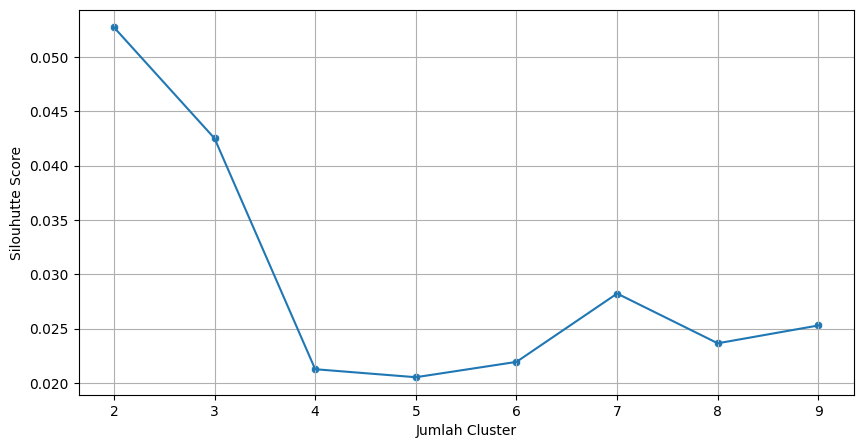

In [45]:
plt.figure(figsize=(10,5))

sns.lineplot(
    x = range(2,10),
    y = bestK
)

sns.scatterplot(
    x = range(2,10),
    y = bestK
)

plt.xticks(range(2,10))

plt.grid()
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silouhutte Score')

plt.show()

In [ ]:
#Get Best Cluster
bestK = []

for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    bestK.append(silhouette_score(data,labels=kmeans.labels_, metric='euclidean'))

In [ ]:
plt.figure(figsize=(10,5))

sns.lineplot(
    x = range(2,21),
    y = bestK
)

sns.scatterplot(
    x = range(2,21),
    y = bestK
)

plt.xticks(range(2,21))

plt.grid()
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silouhutte Score')

plt.show()